In [103]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv('hranalytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
print('the number of rows and columns of the dataset are : ',df.shape)

the number of rows and columns of the dataset are :  (1470, 35)


In [5]:
#checking the information of the dataset and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

we can see there is object type data present in the data

In [7]:
#checking for nan values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

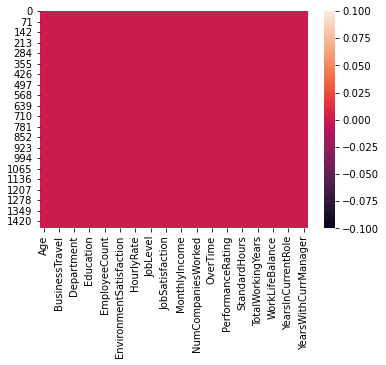

In [8]:
sns.heatmap(df.isnull())

# there are no nan values present in the data

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# EDA and visaulization

In [13]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [14]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [15]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [17]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


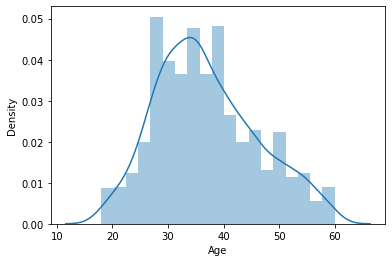

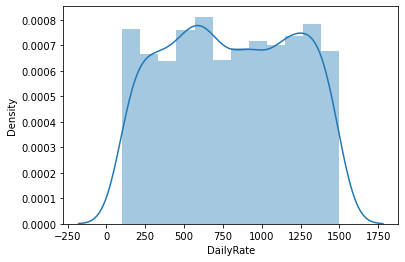

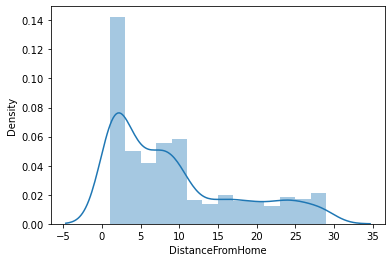

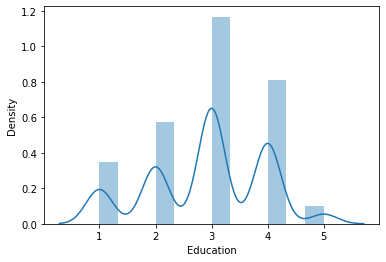

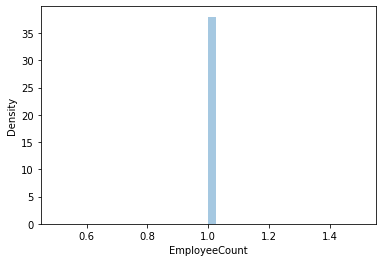

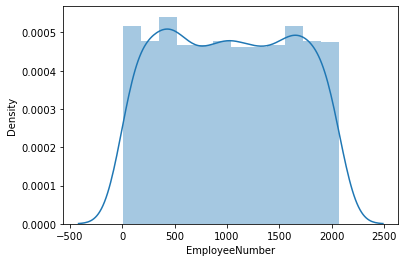

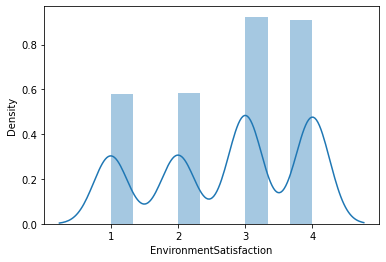

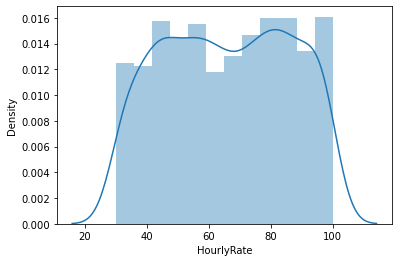

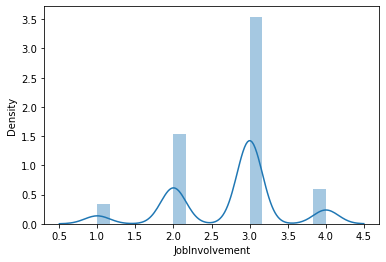

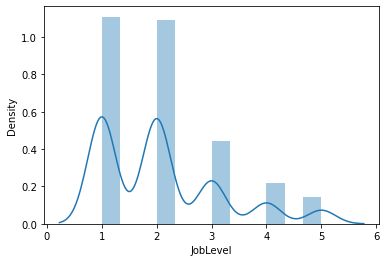

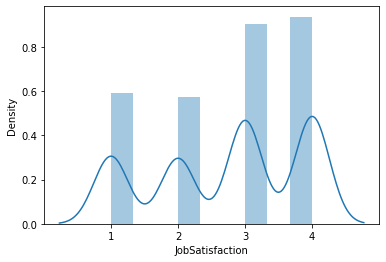

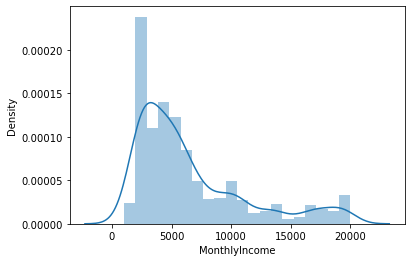

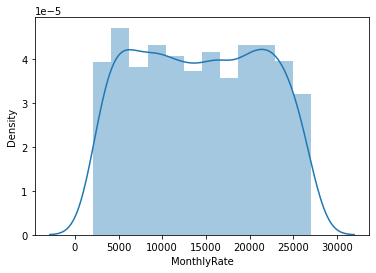

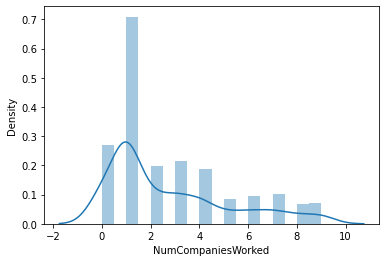

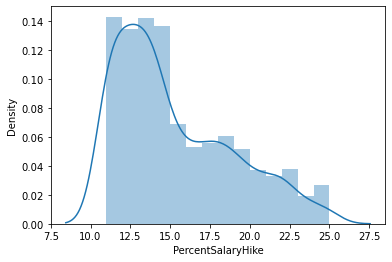

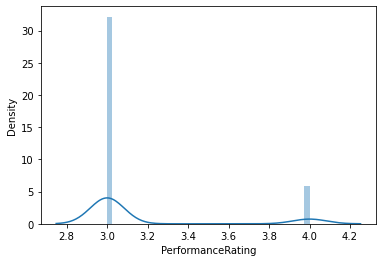

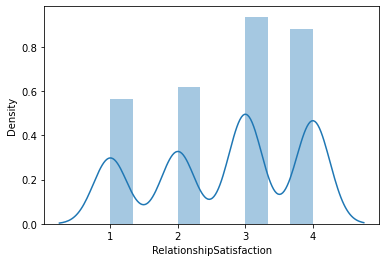

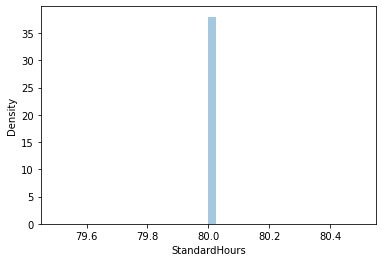

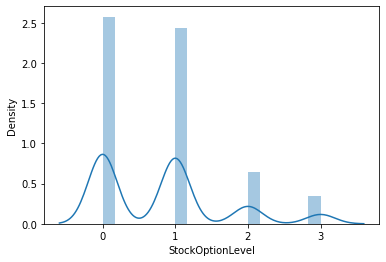

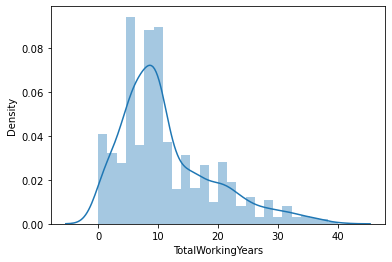

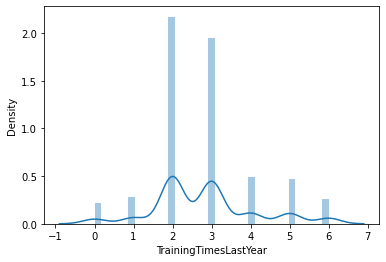

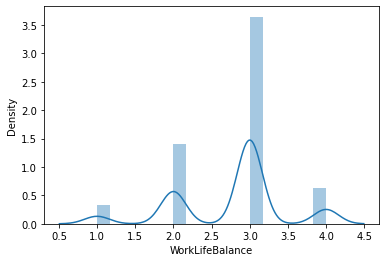

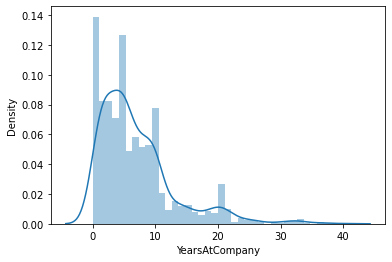

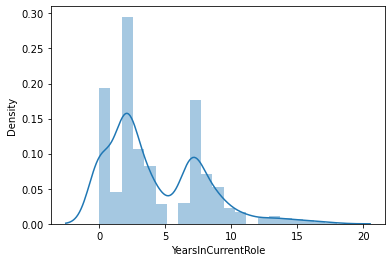

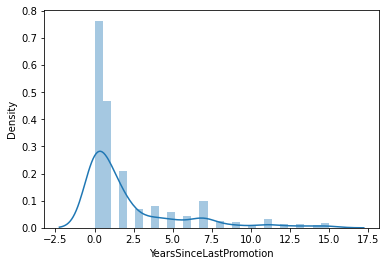

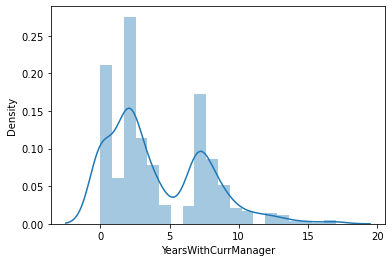

In [18]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

# from the above graphs we can say that data in the data set are not normally distributed

# we can see that columns like work life balace, years at company,years Since last promotion, training times last year,job satisfaction are highly skewed

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Education                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
EmployeeCount               AxesSubplot(0.656429,0.772143;0.110714x0.107857)
EmployeeNumber              AxesSubplot(0.789286,0.772143;0.110714x0.107857)
EnvironmentSatisfaction        AxesSubplot(0.125,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.257857,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
JobLevel                    AxesSubplot(0.523571,0.642714;0.110714x0.107857)
JobSatisfaction             AxesSubplot(0.656429,0.642714;0.110714x0.107857)
MonthlyIncome               AxesSubplot(0.789286,0.642714;0.110714x0.107857)
MonthlyRate                    AxesSubplot(0.125,0.513286;0.110714x0.107857)

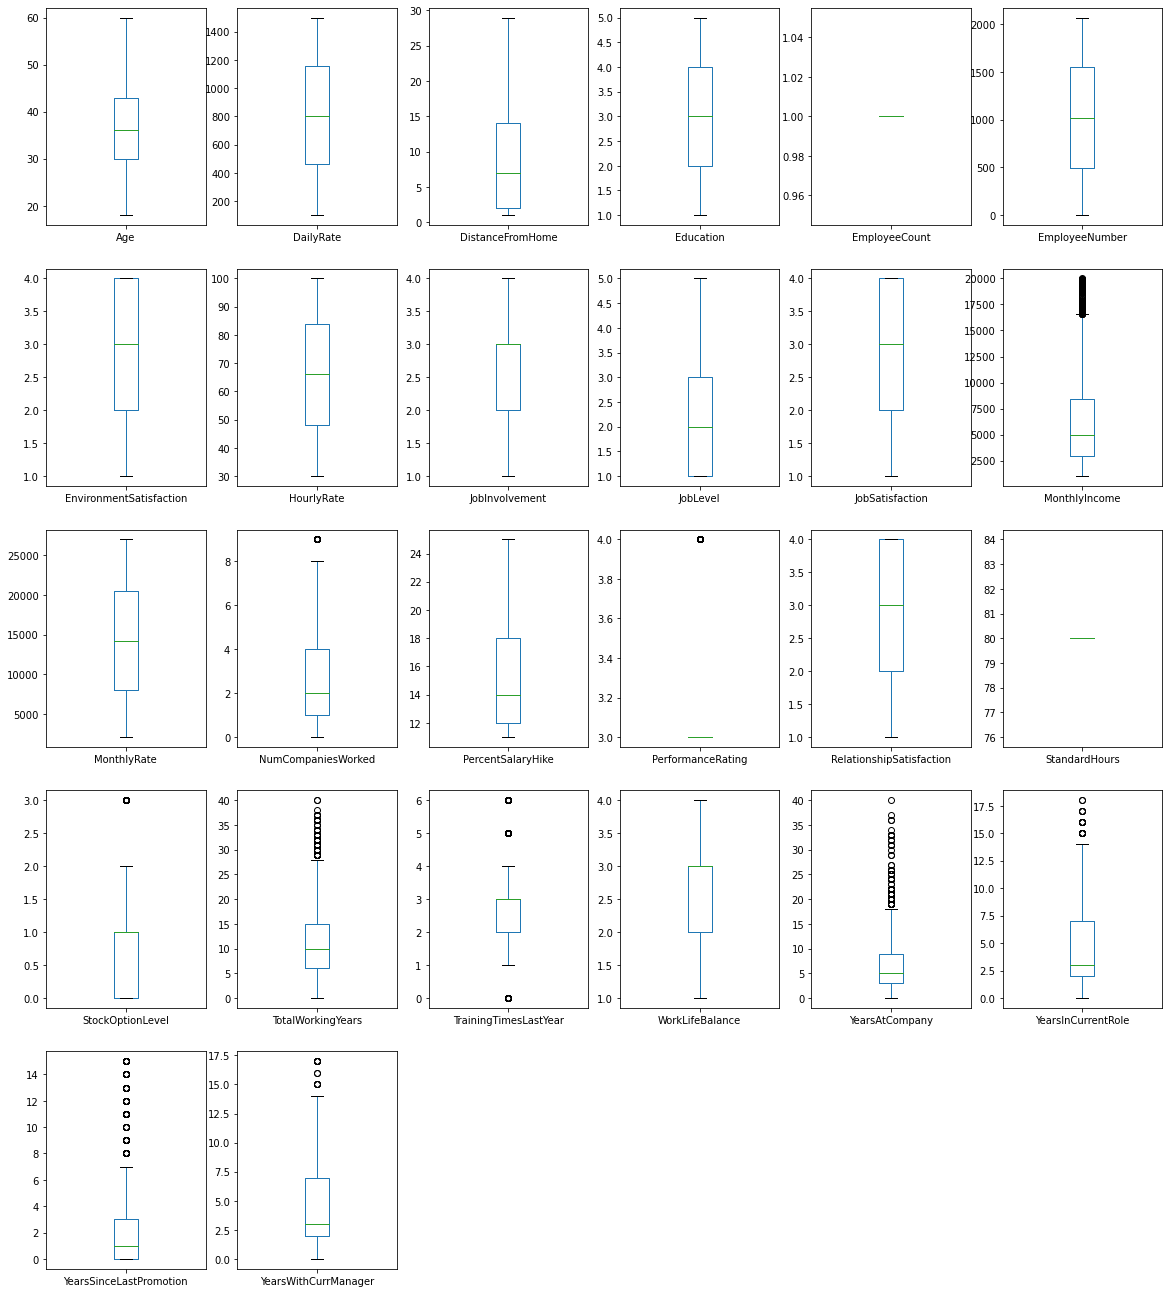

In [24]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,28))

# we can see that there are outliers present in the data from the above boxplots

# checking the graphical relation between attrition and categorical data

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

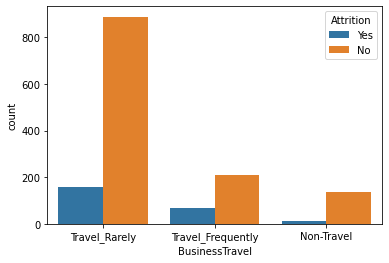

In [25]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

From above graph we can see that employee Travel rarely has more attrition as compared to others

<AxesSubplot:xlabel='Age', ylabel='count'>

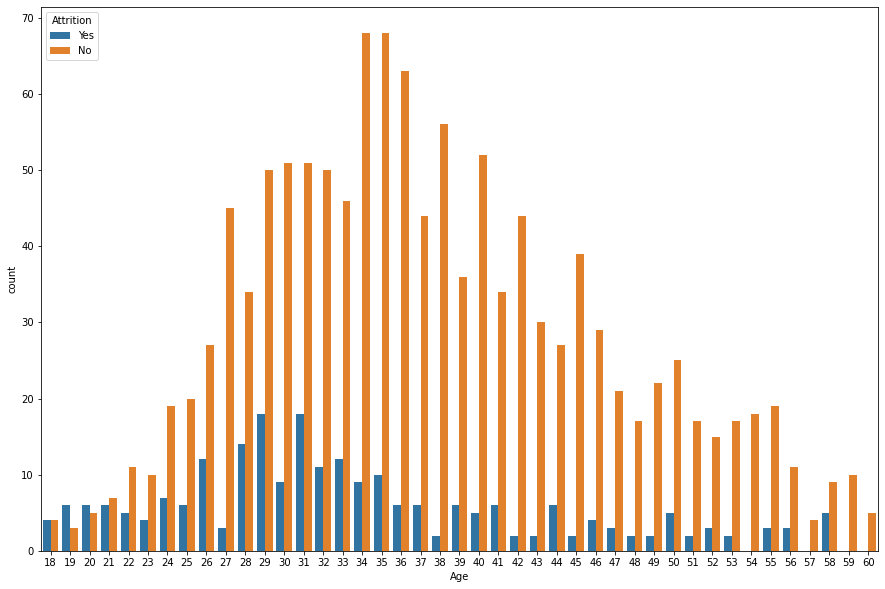

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x='Age',hue='Attrition',data=df)

age group of 28 to 35 have the highest attrition 

age group between 50 to 60 have the least attrition

<AxesSubplot:xlabel='Gender', ylabel='count'>

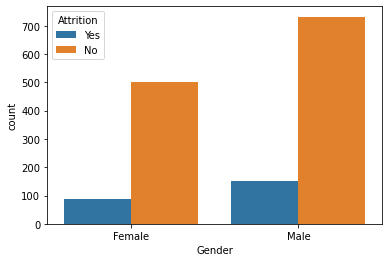

In [36]:
sns.countplot(x="Gender",hue="Attrition",data=df)

male have the high attrition comapared to female

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

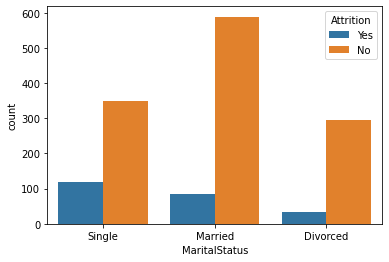

In [40]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

single people have more attrition

<AxesSubplot:xlabel='EducationField', ylabel='count'>

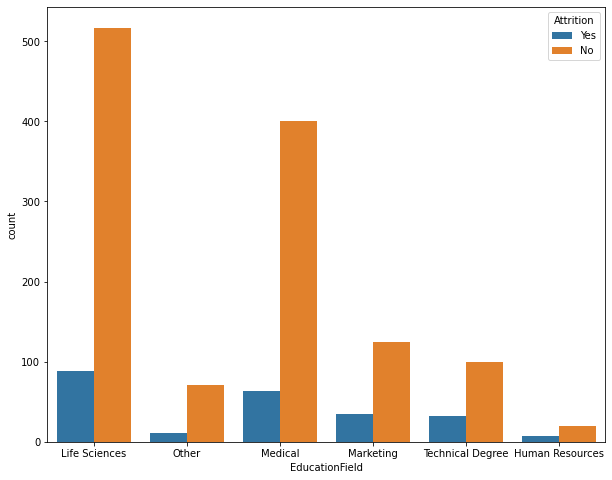

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(x='EducationField',hue='Attrition',data=df)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

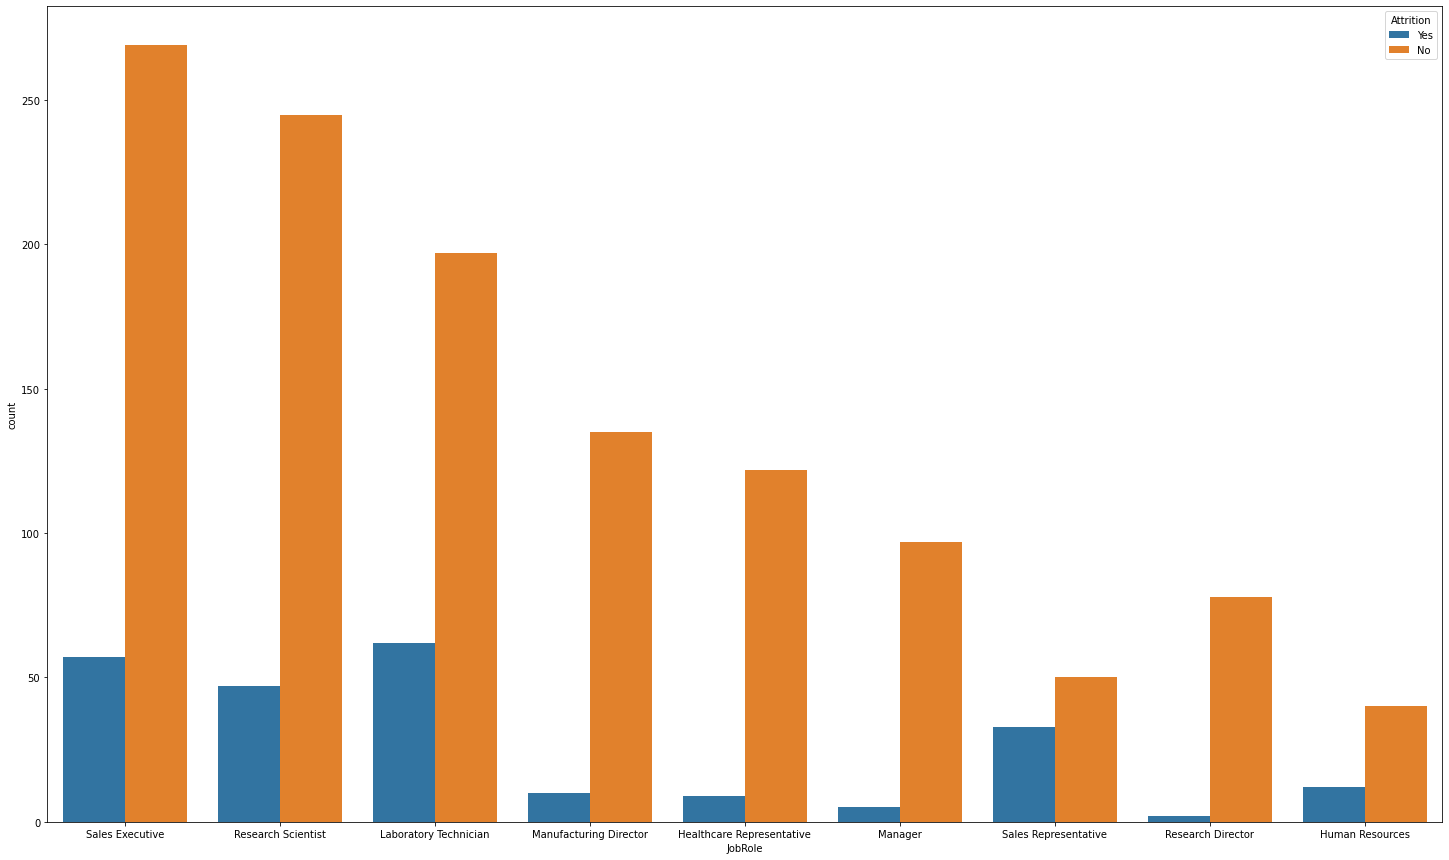

In [47]:
plt.subplots(figsize=(25,15))
sns.countplot(x="JobRole",hue="Attrition",data=df)

sales executive and lab technician have high attrition comapared to others

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

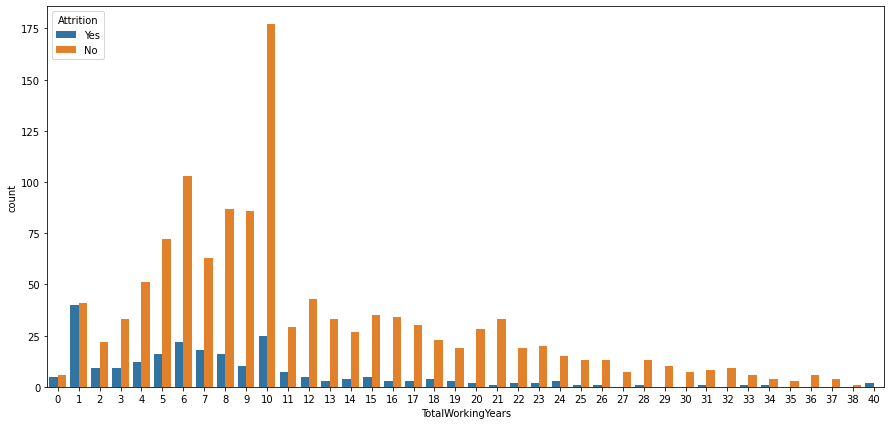

In [48]:
plt.subplots(figsize=(15,7))
sns.countplot(x="TotalWorkingYears",hue="Attrition",data=df)

1 year has the highest attrition and most of the attrition can be seen in 1 to 10 year

# lets see some stats

In [50]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [57]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

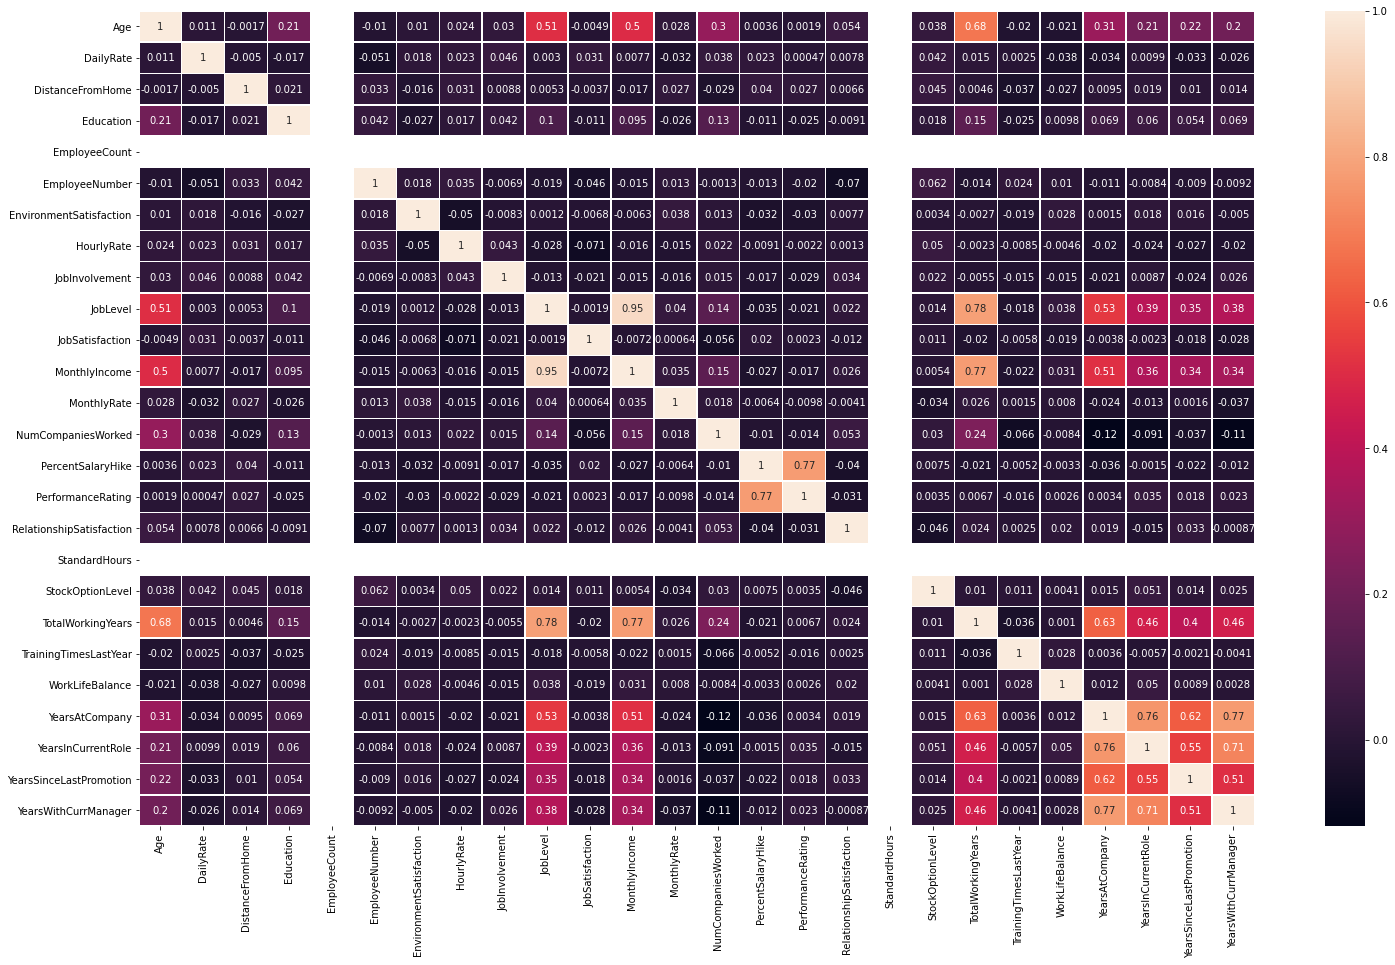

In [56]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

# we need to drop some unwanted comlumns

In [58]:
df.drop(columns=["StandardHours"],inplace=True)
df.drop(columns=["Over18"],inplace=True)
df.drop(columns=["EmployeeCount"],inplace=True)
df.drop(columns=["EmployeeNumber"],inplace=True)

droping age over 18 columns because each employee is 18 plus as min age is 18 so we can drop it

droping Employee Count and Standard Hours as it contains all over similar values

employee number as it does not contain any usefull information to our data

# coverting all object type data to numerical

In [61]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [59]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# using label encoder

In [77]:
df['Attrition']=LabelEncoder().fit_transform(df['Attrition'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [67]:
df['BusinessTravel']=LabelEncoder().fit_transform(df['BusinessTravel'])

In [68]:
df['Department']=LabelEncoder().fit_transform(df['Department'])

In [69]:
df['EducationField']=LabelEncoder().fit_transform(df['EducationField'])

In [70]:
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [71]:
df['JobRole']=LabelEncoder().fit_transform(df['JobRole'])

In [73]:
df['MaritalStatus']=LabelEncoder().fit_transform(df['MaritalStatus'])

In [74]:
df['OverTime']=LabelEncoder().fit_transform(df['OverTime'])

In [76]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

# all the object type data is being converted to numerical data

In [79]:
df.corr()['Attrition']

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
Y

looking at the above analysis we can drop columns such as performance rating, gender, education, BusinessTravel & hourly rate.

they are having the least correalation with Attrition

In [ ]:
df=df.drop(['PerformanceRating','HourlyRate','BusinessTravel','Gender','Education'],axis=1)

In [82]:
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,1,2,3,2,7,...,11,1,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,3,2,2,6,...,23,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,4,4,2,1,2,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,1,4,3,1,6,...,11,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,3,1,3,1,2,...,12,4,1,6,3,3,2,2,2,2


# Removing outliers

In [83]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [84]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([25, 24, 22, 24, 23, 24, 19, 19, 22, 24, 23, 24, 25, 19, 22, 24, 25,
       24, 19, 25, 22, 23, 24, 23, 25, 22, 24, 19, 22, 23, 24, 24, 25, 19,
       22, 22, 24, 24, 19, 23, 22, 22, 24, 22, 25, 24, 22, 19, 22, 24, 25,
       19, 25, 22, 24, 

In [85]:
df1=df[(z<3).all(axis=1)]
df1

,Age,Attrition,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,1,2,3,2,7,...,11,1,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,3,2,2,6,...,23,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,4,4,2,1,2,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,1,4,3,1,6,...,11,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,3,1,3,1,2,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,3,3,4,2,2,...,17,3,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,3,4,2,3,0,...,15,1,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,1,2,4,2,4,...,20,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,2,3,4,2,2,7,...,14,4,0,17,3,2,9,6,0,8


In [86]:
df.shape

(1470, 26)

In [87]:
df1.shape

(1387, 26)

In [89]:
data_loss=(1470-1387)/1470*100
data_loss

5.646258503401361

# data loss after removing outliers is 5 % so we can move forward

# balancing the data

<AxesSubplot:xlabel='Attrition', ylabel='count'>

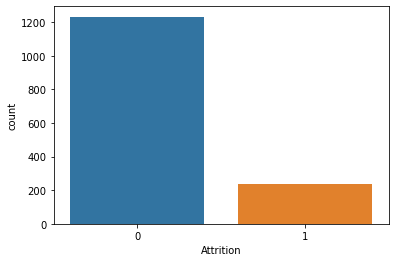

In [90]:
sns.countplot(df['Attrition'])

it is highly unbalanced 

In [98]:
dfx=df.drop(['Attrition'],axis=1)
dfy=df['Attrition']

In [99]:
dfx

,Age,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,1,2,3,2,7,4,...,11,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,3,2,2,6,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,4,4,2,1,2,3,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,1,4,3,1,6,3,...,11,3,0,8,3,3,8,7,3,0
4,27,591,1,2,3,1,3,1,2,2,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,3,3,4,2,2,4,...,17,3,1,17,3,3,5,2,0,3
1466,39,613,1,6,3,4,2,3,0,1,...,15,1,1,9,5,3,7,7,1,7
1467,27,155,1,4,1,2,4,2,4,2,...,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,4,2,2,7,2,...,14,4,0,17,3,2,9,6,0,8


In [100]:
dfy

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [104]:
sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

In [105]:
x.shape

(2466, 25)

In [106]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

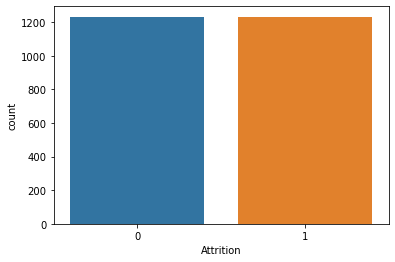

In [107]:
sns.countplot(y)

# now the data is balanced

# removing skewness

In [110]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.70728177,  0.87708132,  1.47794327, ...,  0.45269378,
        -1.03850601,  0.71095342],
       [ 1.42101931, -1.34773905, -0.30158874, ...,  1.0949412 ,
         0.34444423,  1.10621344],
       [ 0.29613786,  1.5482299 , -0.30158874, ..., -1.44383562,
        -1.03850601, -1.3905872 ],
       ...,
       [ 0.29613786, -0.98194403,  1.47794327, ...,  0.16254046,
        -1.03850601, -0.64490433],
       [-0.68182097, -0.20152741, -0.30158874, ...,  0.90817602,
         0.79356575,  0.92065601],
       [-1.12020719,  0.42675819, -2.64995393, ..., -1.44383562,
        -1.03850601,  0.18238395]])

# feature scaling

In [111]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.70728177,  0.87708132,  1.47794327, ...,  0.45269378,
        -1.03850601,  0.71095342],
       [ 1.42101931, -1.34773905, -0.30158874, ...,  1.0949412 ,
         0.34444423,  1.10621344],
       [ 0.29613786,  1.5482299 , -0.30158874, ..., -1.44383562,
        -1.03850601, -1.3905872 ],
       ...,
       [ 0.29613786, -0.98194403,  1.47794327, ...,  0.16254046,
        -1.03850601, -0.64490433],
       [-0.68182097, -0.20152741, -0.30158874, ...,  0.90817602,
         0.79356575,  0.92065601],
       [-1.12020719,  0.42675819, -2.64995393, ..., -1.44383562,
        -1.03850601,  0.18238395]])

# dimension reduction using PCA

In [113]:
for i in range(2,26):
    pc=PCA(n_components=i)
    principalcomponents=pc.fit_transform(x)
    print(i,sum(pc.explained_variance_ratio_))

2 0.26638046332296955
3 0.33508983440298934
4 0.3963319638964171
5 0.4497102808803109
6 0.5012869028993607
7 0.5463943975245128
8 0.5910477834345647
9 0.6310550861746692
10 0.6703522906069792
11 0.7093154447818351
12 0.7475879823701396
13 0.7848898200932827
14 0.8206940631092706
15 0.8550080003947297
16 0.8886730643979726
17 0.9161886691527349
18 0.937028000356387
19 0.9552977466114089
20 0.9691137066609273
21 0.9806483074006926
22 0.9893211139431988
23 0.9961064585163766
24 0.9999999999999999
25 0.9999999999999999


# Data retention more than 95% is good so we will n_components as 19

In [114]:
pca=PCA(n_components=19)
x=pca.fit_transform(x)

In [115]:
x.shape

(2466, 19)

# aftter all the EDA, Cleansing, scaling and balancing we can move forward to build models

# Classification Models

In [116]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc]

In [119]:
#testing the models and checking their accuracy, cross_val_score as well as roc_auc-score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    score=cross_val_score(m,x,y,cv=5).mean()    
    print('cross_val score :',score)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('roc auc score :',roc_auc_score(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.805668016194332
cross_val score : 0.8236460240944066
[[203  56]
 [ 40 195]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       259
           1       0.78      0.83      0.80       235

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494

roc auc score : 0.8067855089131685


Accuracy score of  DecisionTreeClassifier() is :
0.7874493927125507
cross_val score : 0.7794392753611287
[[200  59]
 [ 46 189]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       259
           1       0.76      0.80      0.78       235

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494

roc auc score : 0.7882280456748542


Accuracy score of  KN

# in the above code we checked the models and their accuracy score, roc-auc_score and cross_val_score

# we saw that the random forest classifier and SVC are the best performing models with 90% f1 score and also 87% cross_val_mean score

# we will hypertune these models and will save the best model for this dataset

# hypertuning 

SVC

In [121]:
# best parameter for SVC
svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[0.001,0.1,1.0]}
clf=GridSearchCV(svc,parameters)
clf.fit(xtrain,ytrain)
clf.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [134]:
svc=SVC(kernel='rbf',C=1.0)
svc.fit(x,y)
pred=svc.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  0.9348722582765135
[[244  15]
 [ 17 218]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       259
           1       0.94      0.93      0.93       235

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494

accuracy_score : 0.9352226720647774


Random forest classifier

In [133]:
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,100,150],"max_features": ["auto", "sqrt", "log2"],'criterion':['gini', 'entropy']}
clf=GridSearchCV(rfc,parameters,cv=5,scoring='roc_auc')
clf.fit(xtrain,ytrain)
clf.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 150}

In [135]:
rfc=RandomForestClassifier(n_estimators=150,max_features='auto',criterion='entropy')
rfc.fit(x,y)
pred=rfc.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  1.0
[[259   0]
 [  0 235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       235

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494

accuracy_score : 1.0


# we will check graient boosting classifier as well because it gave us the accuracy of 85% so we will try to hyper tune and check how it performs

Gradient boosting classifier

In [ ]:
parameters={'n_estimators':[10,100,500],'criterion':['friedman_mse', 'mse', 'mae'],'loss':['deviance','exponential']}
clf=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

In [138]:
gb=GradientBoostingClassifier(criterion='friedman_mse',loss= 'exponential', n_estimators= 100)
gb.fit(xtrain,ytrain)
gb.score(x,y)
pred=gb.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  0.8537501026862728
[[213  46]
 [ 27 208]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       259
           1       0.82      0.89      0.85       235

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494

accuracy_score : 0.8522267206477733


# so the best performing model with the roc score of 1.0 is Random Forest classifier

In [141]:
rfc=RandomForestClassifier(n_estimators=150,max_features='auto',criterion='entropy')
rfc.fit(xtrain,ytrain)
pred=rfc.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  0.8937402448040745
[[226  33]
 [ 20 215]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       259
           1       0.87      0.91      0.89       235

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494

accuracy_score : 0.8927125506072875


In [139]:
rfc=RandomForestClassifier(n_estimators=150,max_features='auto',criterion='entropy')
rfc.fit(x,y)
pred=rfc.predict(xtest)
print('roc_auc score : ',roc_auc_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  1.0
[[259   0]
 [  0 235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       235

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494

accuracy_score : 1.0


# checking the roc_auc curve

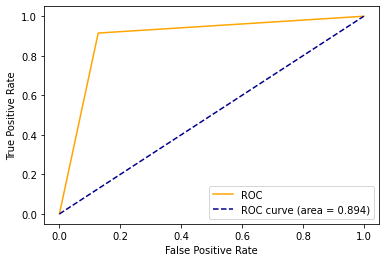

In [142]:
fpr, tpr, threshold = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# saving the best model which is random forest classifier

In [143]:
joblib.dump(rfc,'hr_analytics.obj')

['hr_analytics.obj']